In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\test\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

 ## Read the CSV and Perform Basic Data Cleaning    

In [4]:
df = pd.read_csv("Resources/Autism.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,...,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,...,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,...,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,...,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,...,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [5]:
df = df.drop(columns=['Used_App_Before', 'Language'])
df

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Score,Screening Type,User,Class
0,6,0,0,0,0,0,0,0,0,0,...,27,f,white,no,no,Russia,0,17 and more,parent,NO
1,10,1,1,1,1,1,1,1,1,1,...,21,f,white,no,no,Germany,10,17 and more,self,YES
2,12,1,1,0,1,1,0,0,1,0,...,18,m,black,no,no,United States,5,17 and more,self,NO
3,16,1,0,0,0,1,1,1,1,1,...,49,m,black,no,no,Mexico,7,17 and more,self,YES
4,20,1,1,1,0,0,0,0,1,0,...,18,m,aboriginal,no,no,Indonesia,4,17 and more,self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,2486,0,1,1,0,0,0,0,0,0,...,51,f,white,no,yes,New Zealand,2,17 and more,self,NO
1114,2487,1,1,1,1,1,1,1,1,1,...,43,m,white,no,no,United Kingdom,10,17 and more,self,YES
1115,2489,1,0,0,0,0,0,1,1,1,...,43,m,white,yes,yes,United Kingdom,5,17 and more,self,NO
1116,2492,1,1,0,1,1,1,0,1,0,...,21,f,white,no,no,United States,7,17 and more,self,YES


In [6]:
df.columns

Index(['Case No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age', 'Sex', 'Ethnicity', 'Jaundice ', 'Family_ASD', 'Residence',
       'Score', 'Screening Type', 'User', 'Class'],
      dtype='object')

In [7]:
df = pd.get_dummies(df)
pd.set_option('display.max_columns', None)
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score,Sex_f,Sex_m,Ethnicity_aboriginal,Ethnicity_asian,Ethnicity_black,Ethnicity_hispanic,Ethnicity_latino,Ethnicity_middle eastern,Ethnicity_others,Ethnicity_south asians,Ethnicity_white,Jaundice _no,Jaundice _yes,Family_ASD_no,Family_ASD_yes,Residence_Afghanistan,Residence_AmericanSamoa,Residence_Angola,Residence_Antigua and Barbuda,Residence_Argentina,Residence_Armenia,Residence_Aruba,Residence_Australia,Residence_Austria,Residence_Azerbaijan,Residence_Bahamas,Residence_Bahrain,Residence_Bangladesh,Residence_Belgium,Residence_Bolivia,Residence_Brazil,Residence_Burundi,Residence_Canada,Residence_Chile,Residence_China,Residence_Costa Rica,Residence_Croatia,Residence_Cyprus,Residence_Czech Republic,Residence_Denmark,Residence_Djibouti,Residence_Ecuador,Residence_Egypt,Residence_Ethiopia,Residence_Finland,Residence_France,Residence_French Guiana,Residence_Germany,Residence_Honduras,Residence_Hong Kong,Residence_Hungary,Residence_Iceland,Residence_India,Residence_Indonesia,Residence_Iran,"Residence_Iran, Islamic Republic of",Residence_Iraq,Residence_Ireland,Residence_Italy,Residence_Japan,Residence_Jordan,Residence_Kazakhstan,Residence_Lebanon,Residence_Malaysia,Residence_Mexico,Residence_Nepal,Residence_Netherlands,Residence_New Zealand,Residence_Nicaragua,Residence_Niger,Residence_Norway,Residence_Oman,Residence_Pakistan,Residence_Peru,Residence_Philippines,Residence_Poland,Residence_Portugal,Residence_Qatar,Residence_Romania,Residence_Russia,Residence_Saint Kitts and Nevis,Residence_Saudi Arabia,Residence_Serbia,Residence_Sierra Leone,Residence_Singapore,Residence_South Africa,Residence_Spain,Residence_Sri Lanka,Residence_Sweden,Residence_Switzerland,Residence_Taiwan,Residence_Thailand,Residence_Tonga,Residence_Turkey,Residence_Turkmenistan,Residence_Ukraine,Residence_United Arab Emirates,Residence_United Kingdom,Residence_United States,Residence_Uruguay,Residence_Viet Nam,"Residence_Virgin Islands, U.S.",Residence_Zambia,Screening Type_17 and more,User_friend,User_health care professional,User_others,User_parent,User_relative,User_self,User_teacher,Class_NO,Class_YES
0,6,0,0,0,0,0,0,0,0,0,0,27,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,10,1,1,1,1,1,1,1,1,1,1,21,10,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,12,1,1,0,1,1,0,0,1,0,0,18,5,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,16,1,0,0,0,1,1,1,1,1,1,49,7,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,20,1,1,1,0,0,0,0,1,0,0,18,4,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


## Select your features (columns)    

In [8]:
df.columns

Index(['Case No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       ...
       'Screening Type_17 and more', 'User_friend',
       'User_health care professional', 'User_others', 'User_parent',
       'User_relative', 'User_self', 'User_teacher', 'Class_NO', 'Class_YES'],
      dtype='object', length=126)

In [9]:
# Set features. This will also be used as your x values.
X = df.drop(columns=['Class_NO','Class_YES', 'Case No'])
y = df[['Class_NO','Class_YES']]
print(X.shape, y.shape)

(1117, 123) (1117, 2)


In [51]:
# Now after the feature selections below gridsearch I'll redo my X and y, change in train test split
Xsel = df[['Score', 'A5', 'A9', 'A6', 'A3', 'A4', 'A1', 'A2', 'A7', 'A10', 'A8']]
y = df[['Class_NO','Class_YES']]
print(Xsel.shape, y.shape)

(1117, 11) (1117, 2)


## Create a Train Test Split     
*Use koi_disposition for the y values*

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(Xsel, y, random_state = 1, stratify = y)
#X, y, random_state = 42

## Pre-processing     
*Scale the data using the MinMaxScaler and perform some feature selection*

In [54]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

#X
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#y
y_scaler = MinMaxScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

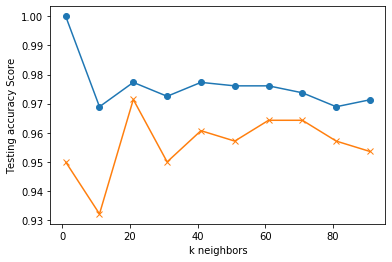

In [55]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for k in range(1, 100, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train_scaled)
    test_score = knn.score(X_test_scaled, y_test_scaled)
    train_scores.append(train_score)
    test_scores.append(test_score)
    #print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 100, 10), train_scores, marker='o')
plt.plot(range(1, 100, 10), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [56]:
# Note that k: 21 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=21)
gs = knn.fit(X_train_scaled, y_train_scaled)
print('k=21 Test Acc: %.3f' % knn.score(X_test_scaled, y_test_scaled))

# I could do a bunch of different 'fits' here
gs

k=21 Test Acc: 0.971


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [57]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test_scaled)}")

Training Data Score: 0.977299880525687
Testing Data Score: 0.9714285714285714


In [58]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = {'leaf_size': [1, 2, 5, 30, 36], 'n_neighbors': [11, 19, 21, 23, 51], 
             'p': [1, 2, 3, 6]}
grid = GridSearchCV(knn, param_grid, verbose=3)
#{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 51, 'p': 1}
#0.9629629629629629

In [59]:
# Train the model with GridSearch
grid.fit(X_train_scaled,y_train_scaled)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] leaf_size=1, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=1, score=0.961, total=   0.0s
[CV] leaf_size=1, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=1, score=0.950, total=   0.0s
[CV] leaf_size=1, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=1, score=0.968, total=   0.0s
[CV] leaf_size=1, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=2, score=0.961, total=   0.0s
[CV] leaf_size=1, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=2, score=0.950, total=   0.0s
[CV] leaf_size=1, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=2, score=0.968, total=   0.1s
[CV] leaf_size=1, n_neighbors=11, p=3 ................................
[CV] .... leaf

[CV] .... leaf_size=1, n_neighbors=51, p=6, score=0.964, total=   0.1s
[CV] leaf_size=2, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=1, score=0.961, total=   0.0s
[CV] leaf_size=2, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=1, score=0.957, total=   0.0s
[CV] leaf_size=2, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=1, score=0.968, total=   0.0s
[CV] leaf_size=2, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=2, score=0.961, total=   0.0s
[CV] leaf_size=2, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=2, score=0.957, total=   0.0s
[CV] leaf_size=2, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=2, score=0.968, total=   0.0s
[CV] leaf_size=2, n_neighbors=11, p=3 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=51, p=6, score=0.978, total=   0.0s
[CV] leaf_size=2, n_neighbors=51, p=6 ................................
[CV] .... leaf_size=2, n_neighbors=51, p=6, score=0.964, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=1, score=0.961, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=1, score=0.961, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=1, score=0.964, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=2, score=0.961, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=2, score=0.961, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=2 ................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=51, p=6, score=0.961, total=   0.0s
[CV] leaf_size=5, n_neighbors=51, p=6 ................................
[CV] .... leaf_size=5, n_neighbors=51, p=6, score=0.975, total=   0.0s
[CV] leaf_size=5, n_neighbors=51, p=6 ................................
[CV] .... leaf_size=5, n_neighbors=51, p=6, score=0.964, total=   0.0s
[CV] leaf_size=30, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=1, score=0.961, total=   0.0s
[CV] leaf_size=30, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=1, score=0.957, total=   0.0s
[CV] leaf_size=30, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=1, score=0.964, total=   0.0s
[CV] leaf_size=30, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=2, score=0.961, total=   0.0s
[CV] leaf_size=30, n_neighbors=11, p=2 ...............................
[CV] .

[CV] ... leaf_size=30, n_neighbors=51, p=6, score=0.957, total=   0.0s
[CV] leaf_size=30, n_neighbors=51, p=6 ...............................
[CV] ... leaf_size=30, n_neighbors=51, p=6, score=0.971, total=   0.0s
[CV] leaf_size=30, n_neighbors=51, p=6 ...............................
[CV] ... leaf_size=30, n_neighbors=51, p=6, score=0.964, total=   0.0s
[CV] leaf_size=36, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=11, p=1, score=0.964, total=   0.0s
[CV] leaf_size=36, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=11, p=1, score=0.957, total=   0.0s
[CV] leaf_size=36, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=11, p=1, score=0.964, total=   0.0s
[CV] leaf_size=36, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=11, p=2, score=0.964, total=   0.0s
[CV] leaf_size=36, n_neighbors=11, p=2 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=51, p=6, score=0.950, total=   0.0s
[CV] leaf_size=36, n_neighbors=51, p=6 ...............................
[CV] ... leaf_size=36, n_neighbors=51, p=6, score=0.975, total=   0.0s
[CV] leaf_size=36, n_neighbors=51, p=6 ...............................
[CV] ... leaf_size=36, n_neighbors=51, p=6, score=0.968, total=   0.0s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   10.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=21, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 5, 30, 36],
                         'n_neighbors': [11, 19, 21, 23, 51],
                         'p': [1, 2, 3, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [60]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 1, 'n_neighbors': 21, 'p': 1}
0.9689366786140979


In [61]:
# print out list of feature importances
# then go back up to feature selection
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train_scaled,y_train_scaled)

feat_importances = pd.Series(model.feature_importances_, index=Xsel.columns)
feat_importances.nlargest(18)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score    0.283999
A9       0.211479
A6       0.154309
A5       0.126839
A3       0.055887
A4       0.041647
A1       0.041156
A7       0.030081
A2       0.021229
A8       0.019023
A10      0.014350
dtype: float64

In [62]:
predictions = gs.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test_scaled, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       190
           1       0.92      1.00      0.96        90

   micro avg       0.97      0.97      0.97       280
   macro avg       0.96      0.98      0.97       280
weighted avg       0.97      0.97      0.97       280
 samples avg       0.97      0.97      0.97       280

